In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings



In [5]:
df = pd.read_csv('combined_dataset.csv')
df

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95905,www.freewebs.com/ryanrules2/,5001,0,1,8035,28,0,0,0,16,2,0
95906,www.ireland-information.com/freecelticfonts.htm,230251,0,1,8400,47,0,0,1,27,2,0
95907,www.clubtaunus.soroptimist.de/img/pro/e.php,10000000,0,0,0,43,0,0,0,29,3,1
95908,www.askmen.com/sports/business/index.html,2008,0,1,9862,41,0,0,0,14,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 8.8+ MB


In [7]:
df.isna().sum()

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

In [8]:
x = df.drop(columns=["label","domain"])
x

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain
0,10000000,0,0,0,20,0,0,1,20,2
1,194914,0,1,7305,42,0,0,0,12,2
2,10000000,0,0,0,155,0,0,0,14,1
3,7001,0,0,0,35,0,0,0,18,3
4,10000000,0,1,730,79,0,0,1,14,1
...,...,...,...,...,...,...,...,...,...,...
95905,5001,0,1,8035,28,0,0,0,16,2
95906,230251,0,1,8400,47,0,0,1,27,2
95907,10000000,0,0,0,43,0,0,0,29,3
95908,2008,0,1,9862,41,0,0,0,14,2


In [9]:
y=df["label"]
y=pd.DataFrame(y)
y.head()

,label
0,1
1,0
2,1
3,0
4,1


In [12]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=2)

In [13]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(67137, 10)
(67137, 1)
(28773, 10)
(28773, 1)


NameError: name 'heatmap' is not defined

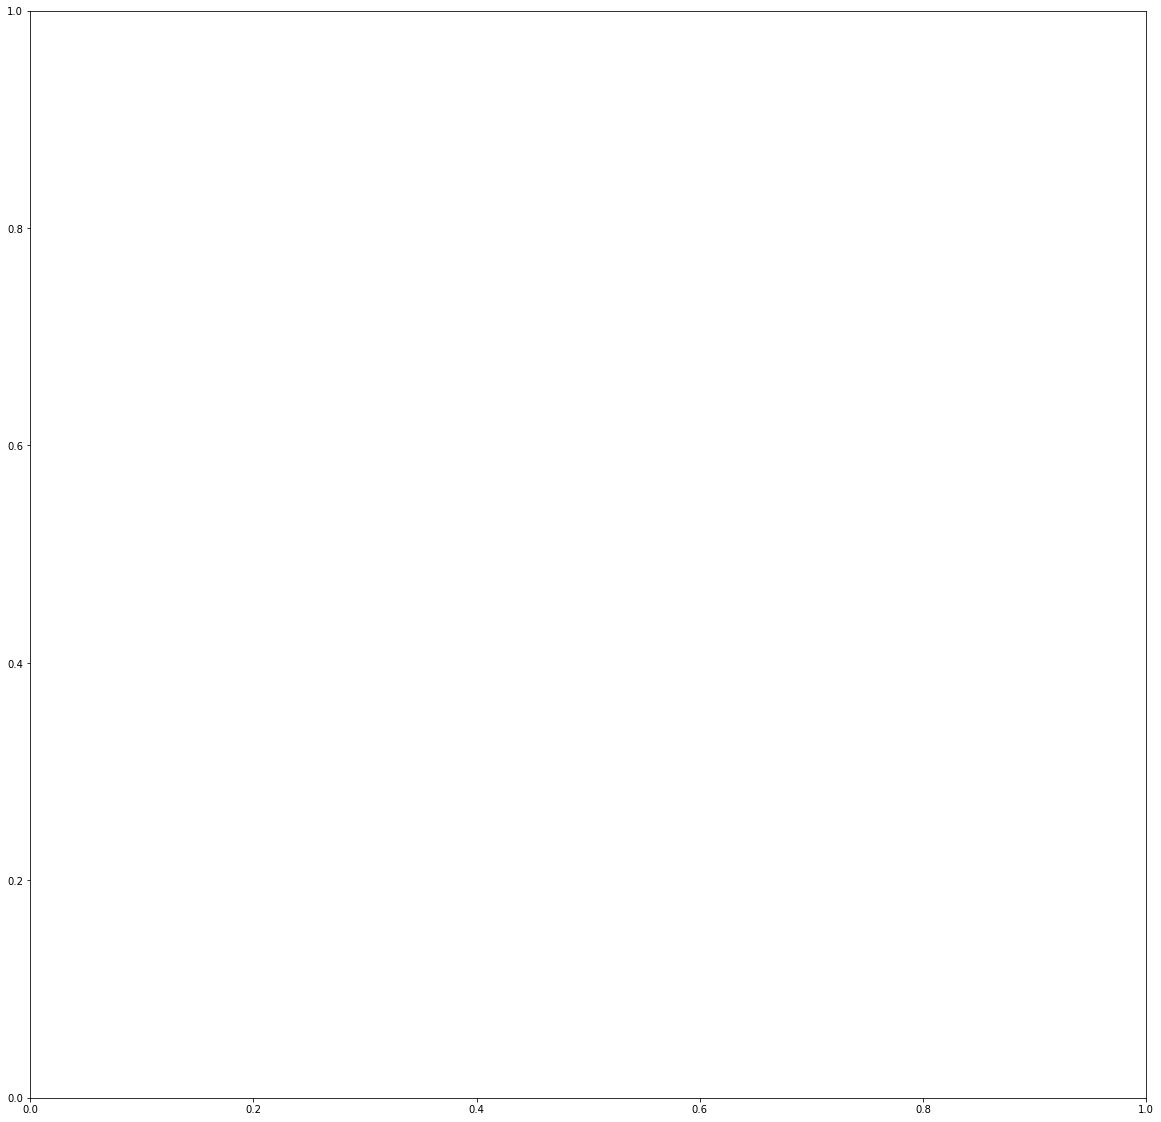

In [15]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(20,20))
sns,heatmap(corr,annot=True,linewidth=2.5,ax=ax)

In [16]:
lg=LogisticRegression()
model1=lg.fit(train_x,train_y)
lg_predict = lg.predict(test_x)
acc_lg=accuracy_score(lg_predict,test_y)
print(acc_lg)
print(classification_report(lg_predict,test_y))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7329788343238453
              precision    recall  f1-score   support

           0       0.56      0.73      0.64      9205
           1       0.85      0.73      0.79     19568

    accuracy                           0.73     28773
   macro avg       0.71      0.73      0.71     28773
weighted avg       0.76      0.73      0.74     28773



<AxesSubplot:>

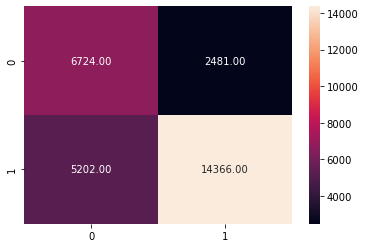

In [17]:
con=confusion_matrix(lg_predict,test_y)
sns.heatmap(con,annot=True,fmt=".2f")

In [18]:
forest =RandomForestClassifier()
model6=forest.fit(train_x,train_y)
forest_predict=forest.predict(test_x)
acc_forest=accuracy_score(test_y,forest_predict)
print(acc_forest)

C:\Users\DELL\AppData\Local\Temp/ipykernel_14772/1606722720.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model6=forest.fit(train_x,train_y)


0.9542974316199214


In [21]:
tree = DecisionTreeClassifier()
model5=tree.fit(train_x,train_y)
tree_predict=tree.predict(test_x)
acc_tree=accuracy_score(test_y,tree_predict)
print(acc_tree)

0.9462690716991624


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isredirect', ylabel='count'>

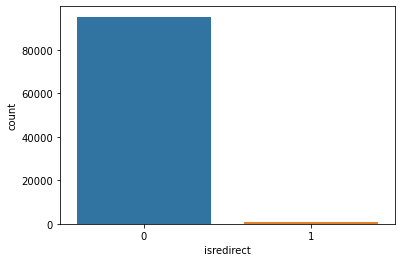

In [22]:
sns.countplot('isredirect',data = df)

In [23]:
df['isredirect'].value_counts()

0    95196
1      714
Name: isredirect, dtype: int64

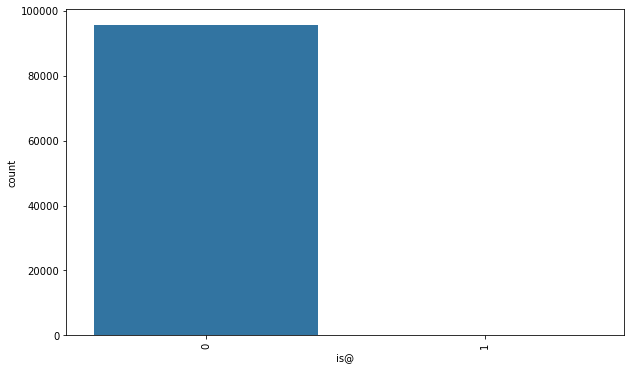

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='is@')
plt.xticks(rotation=90)
plt.show()

In [29]:
df.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.327442,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740134,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


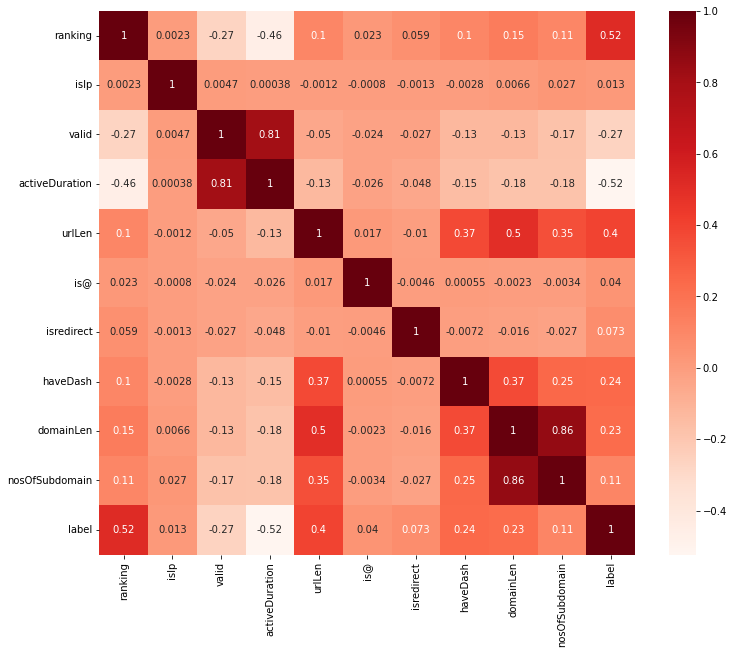

In [30]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()